# Interactive visualisation of timeseries

Idea : display the imag

In [1]:

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

# npy_filename = "./visualisation/2016_forest_prediction.npy"

# with open(npy_filename, "rb") as f:
#    images_2016 = np.load(f, )

# Generate the data
This will be changed to the interesting data

In [2]:
def generate_data(Npoints=50, image_shape=(4028, 4025)):
    """Returns a 1D array of len `Npoints` of the time series, 
    and a stak of 2D images of shape `image_shape`
    
    """
    """Initializis the arrays"""
    dummy_image_vector = np.zeros( (*image_shape, Npoints))
    time_series_values = np.sin(5* np.linspace(0, 2*3.14, Npoints))

    """set the 2D images (so that there is some variation) """
    index_x = np.arange(image_shape[0], dtype=np.int)
    index_y = np.arange(image_shape[1], dtype=np.int)

    for i, value in enumerate(time_series_values):
        mask_x = np.ones(image_shape[0], dtype=np.bool)
        mask_y = np.ones(image_shape[1], dtype=np.bool)
    
        position = i / Npoints * image_shape[0]
        mask_x[index_x > position] = 0
        mask_y[index_y > position] = 0
        
        dummy_image_vector[mask_x,:,i] = value
        
    return time_series_values, dummy_image_vector

time_series_values, dummy_image_vector = generate_data(image_shape=(512, 512))

<IPython.core.display.Javascript object>


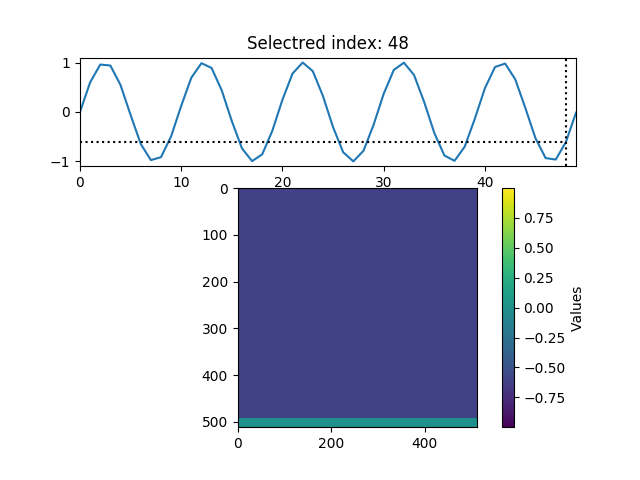

Text(0, 0.5, 'Values')

In [4]:
""" Init the figure"""
fig = plt.figure()
ax_time = plt.subplot2grid((3, 3), (0, 0), colspan=3, fig=fig, picker=True)
ax_im = plt.subplot2grid((3, 3), (1, 0), rowspan=3, colspan=3, fig=fig)

""" plot the time series """
ax_time.plot(time_series_values, picker=5)
title_ax_time = ax_time.set_title("click on the time serie plot !")

"""Set the cursor"""
vertical_line = ax_time.axvline(0, c="k", linestyle=':')
horizontal_line, = ax_time.plot([0,0], [0,0] , c="k", linestyle=':')
ax_time.set_xlim(0, len(time_series_values)-1)


def onclick(event):
    """the interaction: get the click position, and update the plots"""
    
    """get the event informations (mous click)"""
    button = event.button
    x_position = event.x
    y_position = event.y
    ydata_position = event.ydata
    xdata_position = event.xdata
    
    the_ax = event.inaxes
    
    if not the_ax == ax_time:
        """Wrong click"""
        ax_time.set_title("You should click on the upper image")
        return
        
    
    """Readt the values"""
    index_int = int(xdata_position)
    value = time_series_values[index_int]
    title_ax_time.set_text(f"Selectred index: {index_int}")
    
    """Update the 2D image"""
    im.set_data(dummy_image_vector[:,:,index_int])
    
    """update the cursor"""
    vertical_line.set_xdata([index_int]*2)
    horizontal_line.set_xdata([0, index_int])
    horizontal_line.set_ydata([value]*2)
    
    """Draw the updated figure"""
    fig.canvas.draw()

"""Connet the mous_clic event"""
cid = fig.canvas.mpl_connect('button_press_event', onclick)


"""initializing the 2D image: imshow and colorbar """
vmin = dummy_image_vector.min()
vmax = dummy_image_vector.max()

im = ax_im.imshow(dummy_image_vector[:,:,0], vmin=vmin, vmax=vmax)

cb = plt.colorbar(im, ax=ax_im)
cb.ax.set_ylabel("Values")

